# Lab2: Classification


## Data Exploration

In [ ]:
# importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [289]:
# importing the train dataset
train_df = pd.read_csv("C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab2_PowerBI/titanic_train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [290]:
# importing the test dataset
test_df = pd.read_csv("C:/Users/hp/OneDrive - Högskolan Dalarna/Business Intelligence/Lab2_PowerBI/titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [291]:
# to know data types of dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [292]:
# statistics and other info for all variables
train_df.describe()
train_df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


#### Comments: Trying to understand the structure of the data and the values and datatypes of variables.

## Data Preprocessing and Transformation

In [293]:
# Fill missing Age and Fare with median, Embarked with mode for train and test dataframes
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4780\3899424258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_4780\3899424258.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [294]:
# Viewing train dataframe
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [295]:
# Viewing test dataframe
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [296]:
# Dropping variables that are not needed
train_df = train_df.drop(columns= ['PassengerId','Name', 'Ticket', 'Cabin'])
test_df = test_df.drop(columns= ['PassengerId','Name', 'Ticket', 'Cabin'])

In [297]:
# Encoding for different columns for training dataset
train_df_encoded = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
train_df_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [298]:
# Encoding for different columns for test dataset
test_df_encoded = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])
test_df_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,False,True,False,True,False
1,3,47.0,1,0,7.0000,True,False,False,False,True
2,2,62.0,0,0,9.6875,False,True,False,True,False
3,3,27.0,0,0,8.6625,False,True,False,False,True
4,3,22.0,1,1,12.2875,True,False,False,False,True


#### Comments: Treated missing values Age, Embarked and Fare by taking the median or mode (Median for Age and Fare numeric and Mode for Emabarked as it is Categorical), dropped the variables which might not influence the target variable Survived. Also did one hot encoding for variables like Sex and Embarked as they were Nominal variables.

## Training Model: Decision Tree and Random Forest

In [299]:
# Split train data to X_train, X_test, y_train and y_test
X, y = train_df_encoded.drop(columns='Survived'), train_df_encoded['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state = 20)

In [300]:
# DT: Train model
dt_clf = DecisionTreeClassifier( 
    random_state = 20,
    max_depth=5,           # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=20)

In [301]:
# DT: Make predictions
y_pred_dt = dt_clf.predict(X_test)

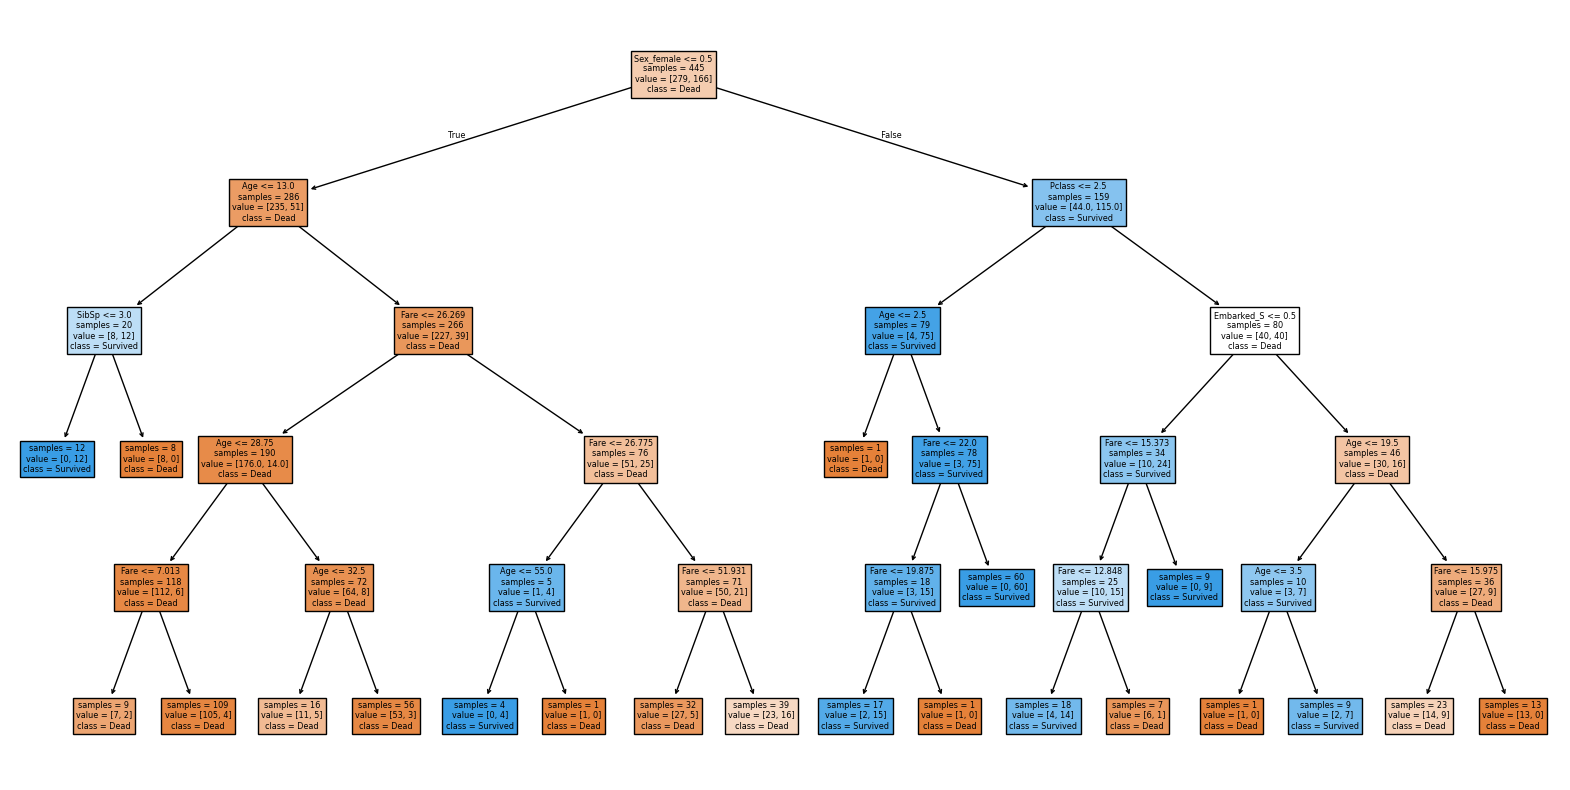

In [302]:
# Visualize decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Dead', 'Survived'], impurity=False)
plt.show()

In [303]:
# RF: Train model 
rf_clf = RandomForestClassifier( 
    random_state = 20,
    n_estimators= 100,        
    max_depth=5,              # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=20)

In [304]:
# RF: Make predictions
y_pred_rf = rf_clf.predict(X_test)

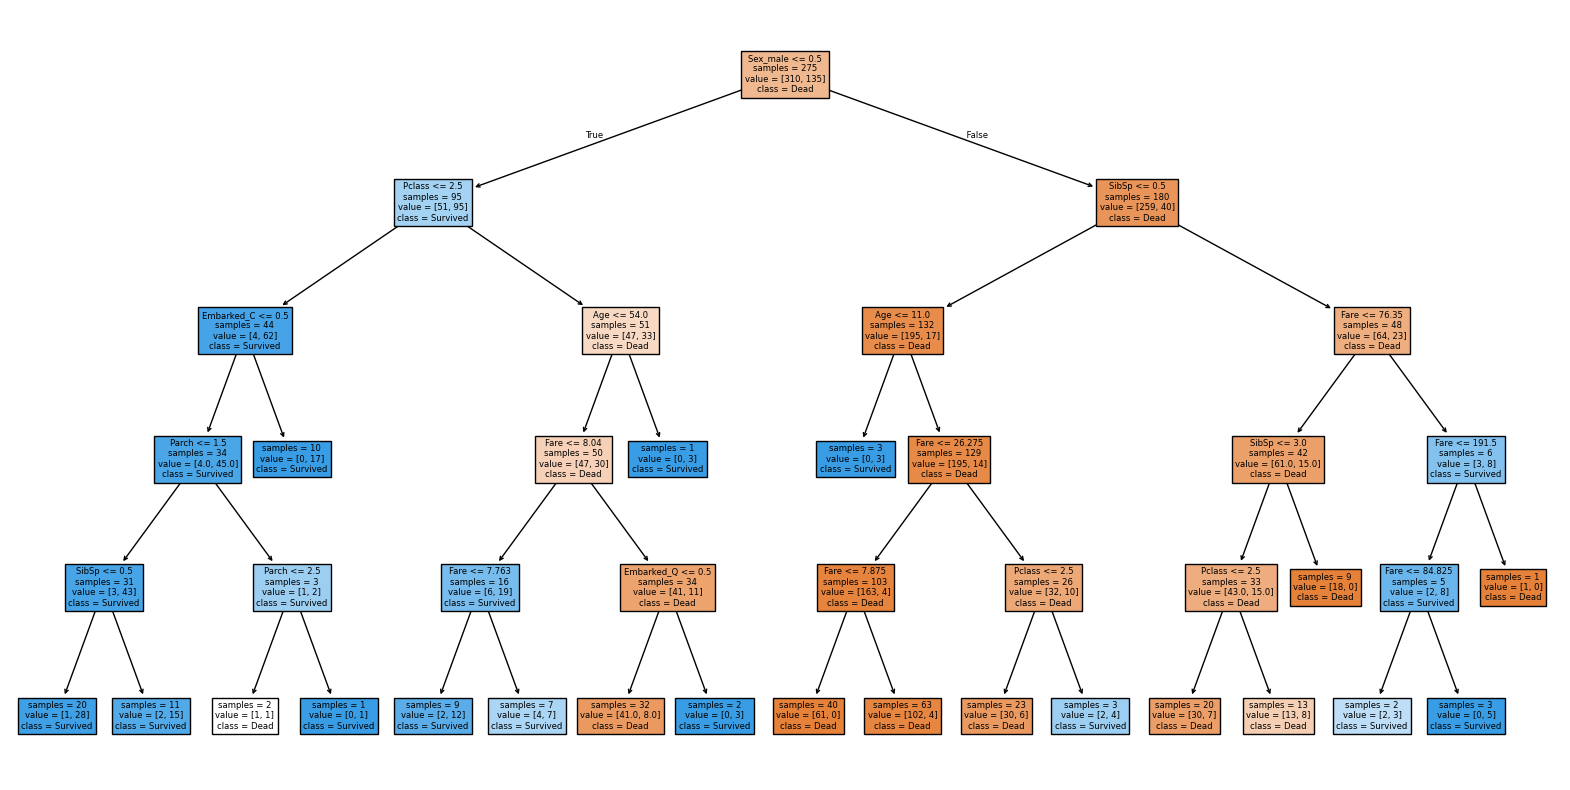

In [305]:
# Visualize one tree from random forest
plt.figure(figsize=(20, 10))
plot_tree(rf_clf.estimators_[0], filled=True, feature_names=X.columns,
          class_names=['Dead', 'Survived'], impurity=False)
plt.show()

#### Comments: Splitting the training data set further to train and test data to first train the decision tree and random forest models and to check for accuracy, precision, recall and confusion later. Observed variations in accuracy of models when there is a change in train_size, random_state (which sets a seed for reproducibility), max_depth of the tree increasing it increases accuracy.

## Accuracy score, Prediction score, Recall score, Confusion matrix

In [306]:
# Accuracy score
print(f"Accuracy DT: {accuracy_score(y_test, y_pred_dt)}")
print(f"Accuracy RF: {accuracy_score(y_test, y_pred_rf)}")

Accuracy DT: 0.8004484304932735
Accuracy RF: 0.8094170403587444


In [307]:
# Precision score
print(f"Precision DT: {precision_score(y_test, y_pred_dt)}")
print(f"Precision RF: {precision_score(y_test, y_pred_rf)}")

Precision DT: 0.8129496402877698
Precision RF: 0.8473282442748091


In [308]:
# Recall score
print(f"Recall DT: {recall_score(y_test, y_pred_dt)}")
print(f"Recall RF: {recall_score(y_test, y_pred_rf)}")

Recall DT: 0.6420454545454546
Recall RF: 0.6306818181818182


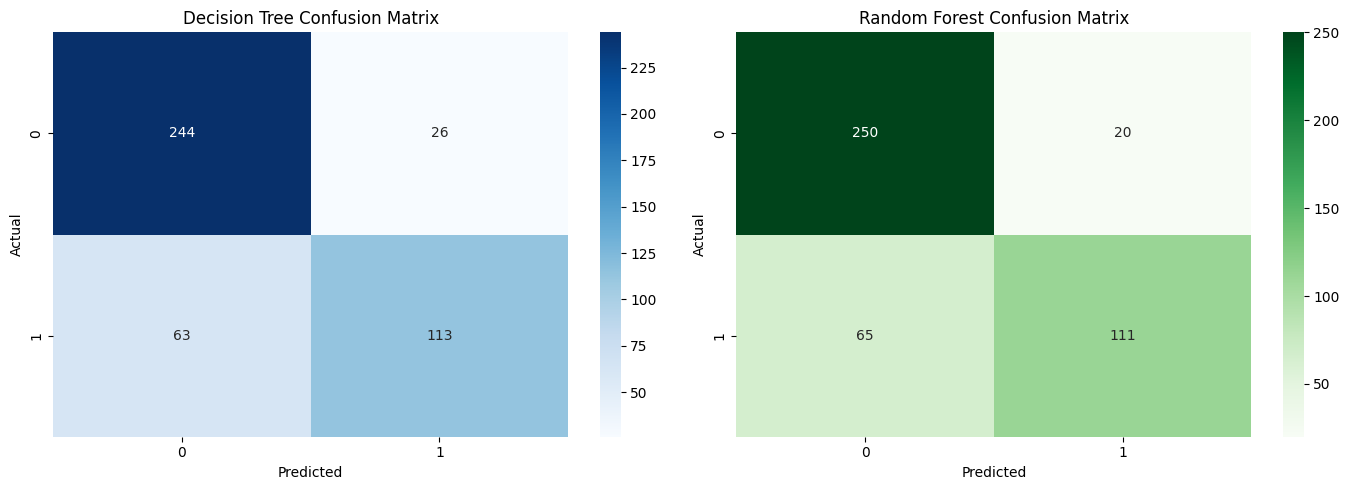

In [309]:
# Confusion Matrix Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Decision Tree Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

#### Comments: All the different scores tell us the which model is better. Accuracy gives the overall correctness, while precision score gives the correctly predicted positive outcomes and recall score gives the proportion of actual positives identified by the model. Accuracy and precision scores are better for Random Forest while recall score is better for Decision Trees. However Random Forest is usually a better model as it uses bootstrapping and feature selection.

## Final Predictions using DT and RF

In [310]:
# DT: Predictions on unseen titanic test data
pred_on_test_dt = dt_clf.predict(test_df_encoded)

# Output
print("Predictions on titanic test data:", pred_on_test_dt)

Predictions on titanic test data: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]


In [311]:
# RF: Predictions on unseen titanic test data
pred_on_test_rf = rf_clf.predict(test_df_encoded)

# Output
print("Predictions on titanic test data:", pred_on_test_rf)

Predictions on titanic test data: [0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


#### Insights on Survival: In terms of accuracy, both models are performing quite well, correctly predicting survival/death about 8 out of 10 times. Random Forest has a slight edge, suggesting its ensemble approach is reducing overfitting. In terms of precision, Random Forest is notably better because when it says someone survived, it's right 84.7% of the time vs 81.3% for Decision Tree implying RF makes fewer false positives. In terms of Recall, both models are missing about 36-37% of actual survivors suggesting both models are somewhat conservative in predicting survival.